# Advanced Analytics of AI and Market Data


## About Dataset

This dataset explores the exponential increase in computational resources used for training artificial intelligence models over the last few decades. It highlights the profound advances in AI capabilities driven by substantial investments and enhanced training computation. Additionally, the dataset delves into the global production of AI hardware, specifically CPUs and GPUs, identifying the key countries dominating this critical industry. This comprehensive dataset aims to provide insights into the correlation between increased computational power and AI advancements, as well as the geopolitical implications of AI hardware production concentration.

This datasets can be found from https://www.kaggle.com/datasets/programmerrdai/ai-computation-and-hardware-trends?select=artificial-intelligence-training-computation.csv

## Importing Libraries and Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = [
    "data/ai-performance-knowledge-tests-vs-training-computation.csv",
    "data/artificial-intelligence-training-computation.csv",
    "data/corporate-investment-in-artificial-intelligence-by-type.csv",
    "data/market-share-logic-chip-production-manufacturing-stage.csv"
]

dataframes = [pd.read_csv(file_path) for file_path in file_paths]

for i, df in enumerate(dataframes):
    print(f"Dataset {i+1} preview:")
    display(df.head())


Dataset 1 preview:


,Entity,Code,Year,MMLU avg,Training computation (petaFLOP),Organization
0,BLOOM,NaN,2022,39.13,412000000,"HuggingFace, BigScience"
1,BloombergGPT,NaN,2023,39.18,212000000,Bloomberg
2,Chinchilla,NaN,2022,67.50,588000000,Google DeepMind
3,GLM-130B,NaN,2022,44.80,312000000,Tsinghua KEG
4,GPT-2 (finetuned),NaN,2019,32.40,36000,OpenAI


Dataset 2 preview:


,Entity,Code,Day,Training computation (petaFLOP),Domain
0,(ensemble): AWD-LSTM-DOC (fin) × 5 (WT2),NaN,2018-08-30,693.00000,Language
1,2-layer-LSTM+Deep-Gradient-Compression,NaN,2017-12-05,1.34000,Language
2,3D city reconstruction,NaN,2009-09-29,NaN,Other
3,4 layer QRNN (h=2500),NaN,2018-03-22,240.00002,Language
4,6-Act Tether,NaN,2021-08-03,NaN,Other


Dataset 3 preview:


,Entity,Code,Year,Total corporate investment - inflation adjusted
0,Merger/Acquisition,NaN,2022,77173925249
1,Merger/Acquisition,NaN,2021,119660000000
2,Merger/Acquisition,NaN,2020,27284262020
3,Merger/Acquisition,NaN,2019,33821216045
4,Merger/Acquisition,NaN,2018,23621530919


Dataset 4 preview:


,Entity,Code,Year,Design,Fabrication,"Assembly, testing and packaging"
0,China,CHN,2021,9.0,12.0,14.0
1,Italy,ITA,2021,NaN,2.0,NaN
2,Japan,JPN,2021,6.0,1.0,7.0
3,Malaysia,MYS,2021,NaN,NaN,2.0
4,Others,NaN,2021,9.0,NaN,5.0


## AI Performance vs Training Computation



Basic Statistics of AI Performance vs Training Computation:


,Code,Year,MMLU avg,Training computation (petaFLOP)
count,0.0,25.000000,25.000000,2.500000e+01
mean,NaN,2021.960000,51.210400,4.849836e+09
std,NaN,1.019804,18.947608,1.625460e+10
min,NaN,2019.000000,25.300000,3.600000e+04
25%,NaN,2022.000000,35.100000,4.020000e+07
50%,NaN,2022.000000,46.900000,3.120000e+08
75%,NaN,2023.000000,67.500000,5.880000e+08
max,NaN,2023.000000,86.400000,8.000000e+10


Correlation between MMLU avg and Training Computation:


,MMLU avg,Training computation (petaFLOP)
MMLU avg,1.000000,0.504565
Training computation (petaFLOP),0.504565,1.000000


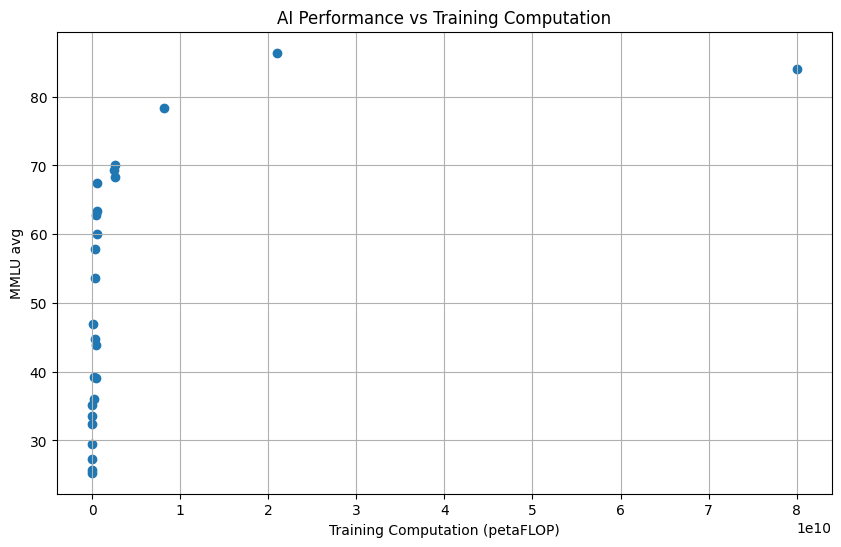

In [2]:
df1 = dataframes[0]

print("Basic Statistics of AI Performance vs Training Computation:")
display(df1.describe())

correlation_df1 = df1[['MMLU avg', 'Training computation (petaFLOP)']].corr()
print("Correlation between MMLU avg and Training Computation:")
display(correlation_df1)

plt.figure(figsize=(10, 6))
plt.scatter(df1['Training computation (petaFLOP)'], df1['MMLU avg'])
plt.xlabel('Training Computation (petaFLOP)')
plt.ylabel('MMLU avg')
plt.title('AI Performance vs Training Computation')
plt.grid(True)
plt.show()


## Artificial Intelligence Training Computation


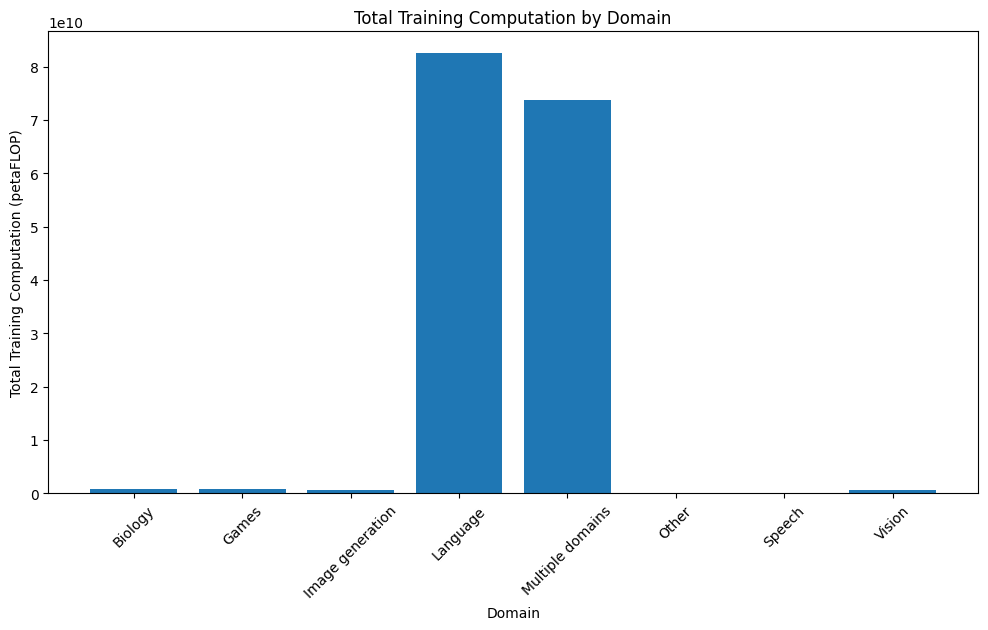

In [4]:
df2 = dataframes[1]

df2.fillna(0, inplace=True)

domain_group = df2.groupby('Domain')['Training computation (petaFLOP)'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(domain_group['Domain'], domain_group['Training computation (petaFLOP)'])
plt.xlabel('Domain')
plt.ylabel('Total Training Computation (petaFLOP)')
plt.title('Total Training Computation by Domain')
plt.xticks(rotation=45)
plt.show()


## Corporate Investment in Artificial Intelligence by Type


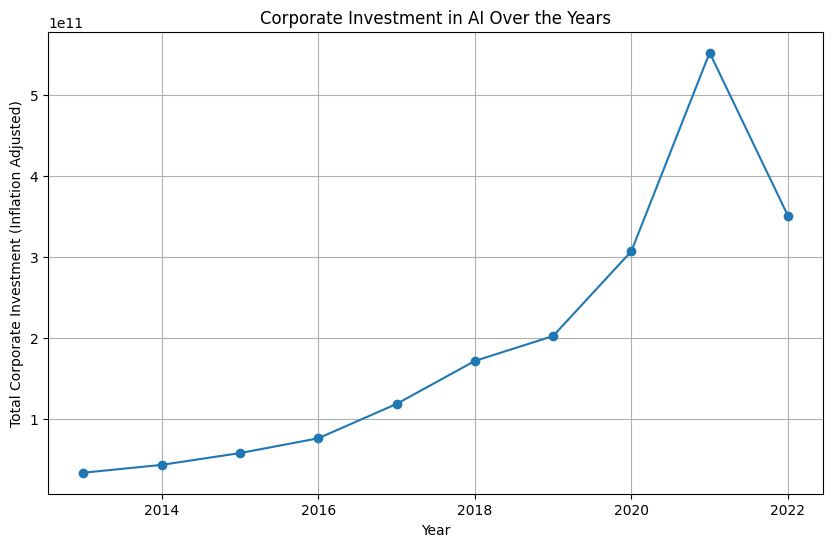

In [5]:
df3 = dataframes[2]

investment_trends = df3.groupby('Year')['Total corporate investment - inflation adjusted'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(investment_trends['Year'], investment_trends['Total corporate investment - inflation adjusted'], marker='o')
plt.xlabel('Year')
plt.ylabel('Total Corporate Investment (Inflation Adjusted)')
plt.title('Corporate Investment in AI Over the Years')
plt.grid(True)
plt.show()


## Market Share in Logic Chip Production by Manufacturing Stage


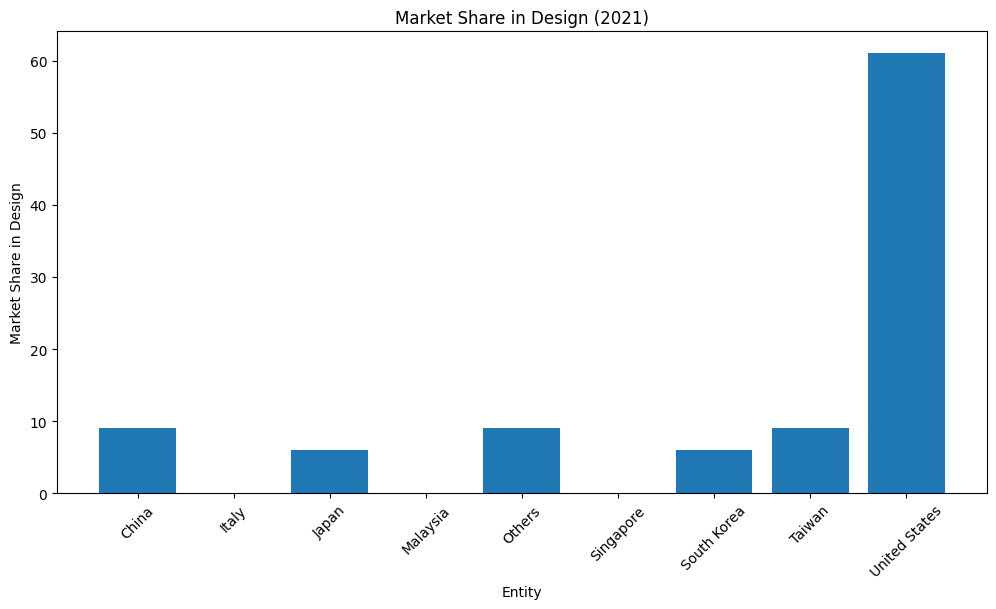

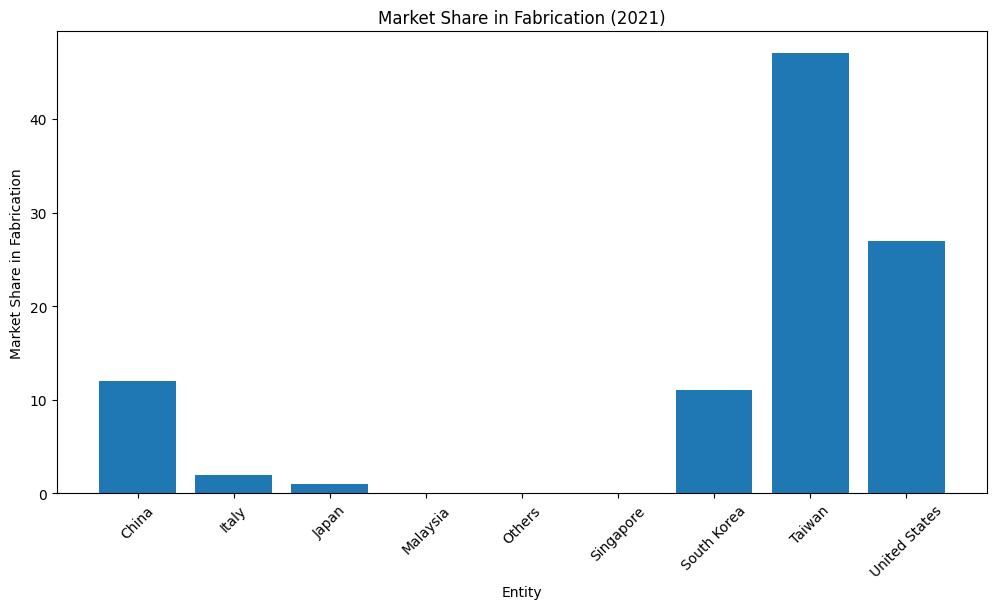

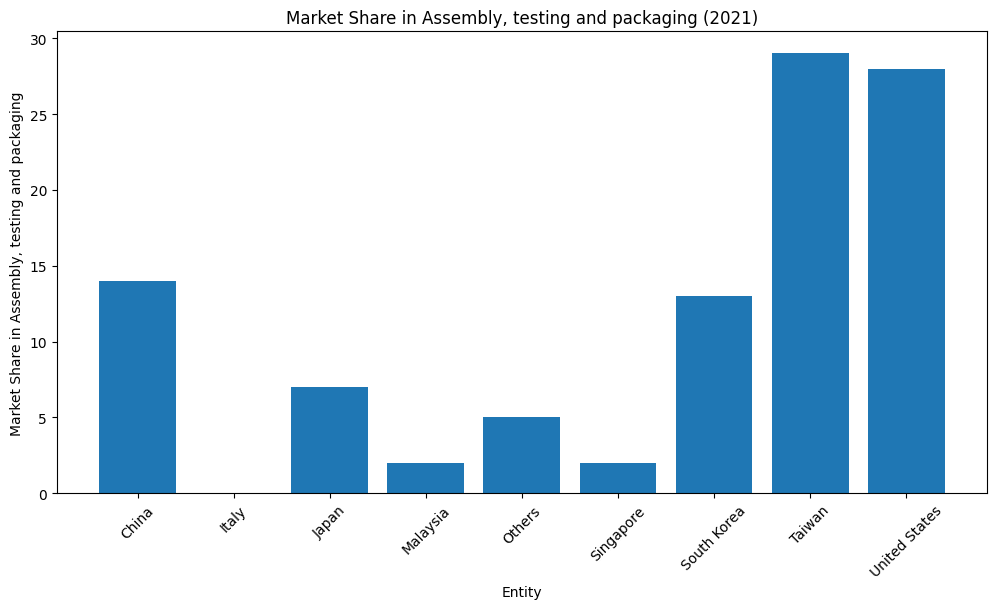

In [8]:
df4 = dataframes[3]

market_share_2021 = df4[df4['Year'] == 2021]

stages = ['Design', 'Fabrication', 'Assembly, testing and packaging']

for stage in stages:
    plt.figure(figsize=(12, 6))
    plt.bar(market_share_2021['Entity'], market_share_2021[stage])
    plt.xlabel('Entity')
    plt.ylabel(f'Market Share in {stage}')
    plt.title(f'Market Share in {stage} (2021)')
    plt.xticks(rotation=45)
    plt.show()


## Conclusion

This notebook provided an analysis of various datasets related to AI and market data. We explored the relationships, trends, and market shares using different visualizations and statistical methods. Further analysis can include deeper statistical tests, predictions using machine learning models, and more granular visualizations.
